# Running DataWrangling_12 processes but on all counties in US
# Running processes in DataWrangling11 but with co pollutants only
* co is the least frequent recorded pollutant from EPA

# Rerun DataWrangling8 processes with alernative datasets from DataWrangling 9

In [1]:
import pandas as pd
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import klib

from IPython.core.display import display

# pd.set_option('display.max_columns', None)
# pd.reset_optio('max_rows')
#np.set_printoptions(threshold=sys.maxsize)

plt.style.use('dark_background')
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style='ticks', context='talk')

# Load data and constants

In [2]:
def remove_col(df, col_name):
    '''Returns a dataframe with removed column or columns from old dataframe'''
    new_df = df.copy()

    if(type(col_name) != str and len(col_name) > 1):
        for index in col_name:
            new_df = new_df.drop(str(index), axis=1)
    else:
        new_df = new_df.drop(str(col_name), axis=1)
    return new_df

    return NE_States
def get_df_with_geofips(df, state_code, county_code):
    ''' Returns dataframe with geofips column '''
    state_code = df[state_code].astype(str).values
    county_code = df[county_code].astype(str).values

    geofips = []
    for stateID, countyID in zip(state_code, county_code):
        id = ''
        stateLen = len(stateID)
        countyLen = len(countyID)
        if(stateLen < 2):
            id += '0' + stateID
        else:
            id += stateID
        if(countyLen == 1):
            id += '00' + countyID
        elif(countyLen == 2):
            id += '0' + countyID
        else:
            id += countyID
        geofips.append(id)

    df.insert(loc=0, column='GeoFIPS', value=geofips)
    return df

In [3]:
co_2017 = pd.read_csv('../../data/raw/CO_2017.csv')
co_2018 = pd.read_csv('../../data/raw/CO_2018.csv')
co_2019 = pd.read_csv('../../data/raw/CO_2019.csv')

county_incomes = r'../../data/processed/county_incomes_2017_2019'
county_incomes_2017_2019 = pd.read_csv(county_incomes)

educ_vehicle = r'../../data/processed/clean_edu_vehicle_2017_2019.csv'
educ_vehicle_2017_2019 = pd.read_csv(educ_vehicle)

pov_rate = r'../../data/processed/clean_pov_rate_2017_2019.csv'
pov_rate_2017_2019 = pd.read_csv(pov_rate)

unemploy_county_rate = r'../../data/processed/clean_UE_rate_2017_2019.csv'
unemploy_rate_2017_2019 = pd.read_csv(unemploy_county_rate)

county_dem_ratio = r'../../data/processed/clean_county_dem_ratio_2017_2019.csv'
county_dem_ratio_2017_2019 = pd.read_csv(county_dem_ratio)

## Retrieve co data

In [4]:
print(co_2017.shape)

(204971, 29)


In [5]:
# add GeoFIPS for NE aqi counties
co_2017 = get_df_with_geofips(co_2017, 'State Code', 'County Code')
co_2018 = get_df_with_geofips(co_2018, 'State Code', 'County Code')
co_2019 = get_df_with_geofips(co_2019, 'State Code', 'County Code')

In [6]:
# Remove unnecessary columns

co_2017.columns
cols_to_remove = ['State Code', 'County Code', 'Site Num', 'Parameter Code',
       'POC', 'Latitude', 'Longitude', 'Datum', 'Parameter Name',
       'Sample Duration', 'Pollutant Standard', 'Date Local',
       'Units of Measure', 'Event Type', 'Observation Count',
       'Observation Percent', 'Arithmetic Mean', '1st Max Value',
       '1st Max Hour', 'Method Code', 'Method Name', 'Local Site Name',
       'Address', 'CBSA Name', 'Date of Last Change']

co_2017 = remove_col(co_2017, cols_to_remove)
co_2018 = remove_col(co_2018, cols_to_remove)
co_2019 = remove_col(co_2019, cols_to_remove)

In [7]:
co_2017.rename(columns={'AQI':'AQI_2017'}, inplace=True)
co_2018.rename(columns={'AQI':'AQI_2018'}, inplace=True)
co_2019.rename(columns={'AQI':'AQI_2019'}, inplace=True)

In [8]:
print(co_2017.columns)
average_co_2017 = co_2017.groupby(['GeoFIPS', 'State Name', 'County Name'], as_index=False)[['AQI_2017']].mean()
average_co_2018 = co_2018.groupby(['GeoFIPS', 'State Name', 'County Name'], as_index=False)[['AQI_2018']].mean()
average_co_2019 = co_2019.groupby(['GeoFIPS', 'State Name', 'County Name'], as_index=False)[['AQI_2019']].mean()

display(average_co_2017)
display(average_co_2018)
display(average_co_2019)


Index(['GeoFIPS', 'AQI_2017', 'State Name', 'County Name', 'City Name'], dtype='object')


,GeoFIPS,State Name,County Name,AQI_2017
0,01073,Alabama,Jefferson,5.154717
1,02020,Alaska,Anchorage,12.637363
2,02090,Alaska,Fairbanks North Star,5.787966
3,04012,Arizona,La Paz,1.765472
4,04013,Arizona,Maricopa,6.706383
...,...,...,...,...
172,56039,Wyoming,Teton,2.164384
173,72025,Puerto Rico,Caguas,3.631579
174,72061,Puerto Rico,Guaynabo,4.310484
175,72113,Puerto Rico,Ponce,5.448780


,GeoFIPS,State Name,County Name,AQI_2018
0,01073,Alabama,Jefferson,4.434060
1,02020,Alaska,Anchorage,9.455882
2,02090,Alaska,Fairbanks North Star,5.450746
3,04012,Arizona,La Paz,1.651515
4,04013,Arizona,Maricopa,6.272947
...,...,...,...,...
171,56039,Wyoming,Teton,1.752266
172,72021,Puerto Rico,Bayamon,12.770000
173,72025,Puerto Rico,Caguas,8.477612
174,72061,Puerto Rico,Guaynabo,4.321300


,GeoFIPS,State Name,County Name,AQI_2019
0,01073,Alabama,Jefferson,4.836009
1,02020,Alaska,Anchorage,9.669856
2,02090,Alaska,Fairbanks North Star,5.839181
3,04013,Arizona,Maricopa,5.607080
4,04019,Arizona,Pima,3.080000
...,...,...,...,...
166,72021,Puerto Rico,Bayamon,2.927007
167,72025,Puerto Rico,Caguas,6.759312
168,72061,Puerto Rico,Guaynabo,6.185596
169,72113,Puerto Rico,Ponce,4.573123


In [9]:
# Merge avg northeast co data

avg_co_2017_2018 = pd.merge(average_co_2017, average_co_2018, how='inner')
avg_co_2017_2019 = pd.merge(avg_co_2017_2018, average_co_2019, how='inner')
avg_co_2017_2019

avg_co_2017_2019['GeoFIPS'] = pd.to_numeric(avg_co_2017_2019['GeoFIPS'])
avg_co_2017_2019.dtypes

GeoFIPS          int64
State Name      object
County Name     object
AQI_2017       float64
AQI_2018       float64
AQI_2019       float64
dtype: object

* Have 3 datasets for individuals years 2017, 2018, 2019

In [10]:
display(avg_co_2017_2019)
display(unemploy_rate_2017_2019)
display(pov_rate_2017_2019)
display(educ_vehicle_2017_2019)
display(county_dem_ratio_2017_2019)
display(county_incomes_2017_2019)


,GeoFIPS,State Name,County Name,AQI_2017,AQI_2018,AQI_2019
0,1073,Alabama,Jefferson,5.154717,4.434060,4.836009
1,2020,Alaska,Anchorage,12.637363,9.455882,9.669856
2,2090,Alaska,Fairbanks North Star,5.787966,5.450746,5.839181
3,4013,Arizona,Maricopa,6.706383,6.272947,5.607080
4,4019,Arizona,Pima,3.556857,3.667996,3.080000
...,...,...,...,...,...,...
161,56021,Wyoming,Laramie,1.848315,1.661850,1.880814
162,56039,Wyoming,Teton,2.164384,1.752266,1.328767
163,72025,Puerto Rico,Caguas,3.631579,8.477612,6.759312
164,72061,Puerto Rico,Guaynabo,4.310484,4.321300,6.185596


,GeoFIPS,Stabr,area_name,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019
0,1001,AL,"Autauga County, AL",26075,25062,1013,3.9,26196,25261,935,3.6,26172,25458,714,2.7
1,1003,AL,"Baldwin County, AL",92456,88711,3745,4.1,95233,91809,3424,3.6,97328,94675,2653,2.7
2,1005,AL,"Barbour County, AL",8349,7863,486,5.8,8414,7987,427,5.1,8537,8213,324,3.8
3,1007,AL,"Bibb County, AL",8583,8208,375,4.4,8605,8268,337,3.9,8685,8419,266,3.1
4,1009,AL,"Blount County, AL",24822,23824,998,4.0,25069,24201,868,3.5,25331,24655,676,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,72145,PR,"Vega Baja Municipio, PR",13414,11746,1668,12.4,13117,11750,1367,10.4,13037,11791,1246,9.6
3214,72147,PR,"Vieques Municipio, PR",3027,2589,438,14.5,2718,2269,449,16.5,2585,2406,179,6.9
3215,72149,PR,"Villalba Municipio, PR",7557,6090,1467,19.4,7311,6154,1157,15.8,7406,6231,1175,15.9
3216,72151,PR,"Yabucoa Municipio, PR",9000,7512,1488,16.5,8762,7509,1253,14.3,8691,7552,1139,13.1


,GeoFIPS,Postal Code,Name,"Poverty Estimate, All Ages_2017",90% CI LB All Ages_2017,90% CI UB All Ages_2017,"Poverty Percent, All Ages_2017",90% CI LB percent_2017,90% CI UB percent_2017,"Poverty Estimate, Age 0-17_2017",...,90% CI UB 0-17 percent_2019,"Poverty Estimate, Age 5-17 in Families_2019",90% CI LB 5-17 fam_2019,90% CI UB 5-17 fam_2019,"Poverty Percent, Age 5-17 in Families_2019",90% CI LB 5-17 percent_2019,90% CI UB percent 5-17 percent_2019,Median Household Income_2019,90% CI Lower Bound LB medh inc_2019,90% CI UB medh inc_2019
0,1001,AL,Autauga County,7390.0,6147.0,8633.0,13.4,11.1,15.7,2542.0,...,20.3,1376.0,902.0,1850.0,14.4,9.4,19.4,58233.0,52517.0,63949.0
1,1003,AL,Baldwin County,21199.0,17444.0,24954.0,10.1,8.3,11.9,6734.0,...,17.4,4641.0,3295.0,5987.0,13.3,9.4,17.2,59871.0,54593.0,65149.0
2,1005,AL,Barbour County,7414.0,6325.0,8503.0,33.4,28.5,38.3,2606.0,...,50.8,1468.0,1114.0,1822.0,39.5,30.0,49.0,35972.0,31822.0,40122.0
3,1007,AL,Bibb County,4137.0,3187.0,5087.0,20.2,15.5,24.9,1242.0,...,33.1,808.0,566.0,1050.0,25.2,17.7,32.7,47918.0,42291.0,53545.0
4,1009,AL,Blount County,7343.0,5805.0,8881.0,12.8,10.1,15.5,2484.0,...,25.3,2067.0,1641.0,2493.0,21.4,17.0,25.8,52902.0,46777.0,59027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,56037,WY,Sweetwater County,4253.0,3540.0,4966.0,10.0,8.3,11.7,1509.0,...,13.0,644.0,416.0,872.0,8.2,5.3,11.1,80639.0,73437.0,87841.0
3002,56039,WY,Teton County,1348.0,1021.0,1675.0,5.8,4.4,7.2,296.0,...,7.8,142.0,83.0,201.0,4.7,2.7,6.7,98837.0,86531.0,111143.0
3003,56041,WY,Uinta County,2067.0,1623.0,2511.0,10.2,8.0,12.4,697.0,...,13.1,336.0,193.0,479.0,7.8,4.5,11.1,70756.0,63191.0,78321.0
3004,56043,WY,Washakie County,845.0,632.0,1058.0,10.7,8.0,13.4,260.0,...,18.9,160.0,94.0,226.0,12.3,7.2,17.4,55122.0,50050.0,60194.0


,GeoFIPS,NAME,state,county,POP_2017,EDU_TOT_2017,LESS_HS_TOT_2017,HS_TOT_2017,COL_OR_ASSOC_TOT_2017,BACH_TOT_2017,...,BACH_TOT_2019,GRAD_TOT_2019,VEHICLE_TOT_2019,EDU_TOT_ratio_2019,LESS_HS_TOT_ratio_2019,HS_TOT_ratio_2019,COL_OR_ASSOC_TOT_ratio_2019,BACH_TOT_ratio_2019,GRAD_TOT_ratio_2019,VEHICLE_TOT_ratio_2019
0,36089,"St. Lawrence County, New York",36,89,109623,72555.0,9164.0,25858.0,20091.0,8279.0,...,8684.0,7733.0,33650,67.044737,8.564136,23.762762,19.480230,8.060145,7.177464,31.232597
1,36091,"Saratoga County, New York",36,91,229869,164414.0,10656.0,39033.0,45561.0,37886.0,...,40148.0,30363.0,104085,72.095118,4.492676,17.754924,19.172290,17.466056,13.209172,45.281320
2,36093,"Schenectady County, New York",36,93,155565,107453.0,10085.0,32144.0,35263.0,17210.0,...,22627.0,15566.0,59970,70.183324,5.047682,20.198456,20.343982,14.569959,10.023245,38.615831
3,36101,"Steuben County, New York",36,101,96281,68011.0,6510.0,25920.0,20685.0,7451.0,...,8066.0,8475.0,35505,71.044989,6.093585,25.791841,21.817171,8.456788,8.885604,37.225175
4,36103,"Suffolk County, New York",36,103,1492953,1036946.0,102621.0,277080.0,279213.0,208064.0,...,214035.0,182346.0,629360,70.148605,6.397598,18.389192,18.517663,14.495114,12.349037,42.622211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,36079,"Putnam County, New York",36,79,99323,71447.0,5090.0,20597.0,18095.0,14929.0,...,15240.0,12261.0,42420,73.443857,5.721115,19.355167,20.396664,15.500407,12.470504,43.144833
832,36081,"Queens County, New York",36,81,2358582,1695302.0,304984.0,493794.0,372885.0,335990.0,...,334272.0,207624.0,387870,72.484558,12.328372,19.812340,16.300805,14.831103,9.211938,17.209159
833,36083,"Rensselaer County, New York",36,83,159722,111047.0,9095.0,31730.0,34954.0,20143.0,...,20896.0,18203.0,65615,70.327759,5.902441,19.919478,19.870963,13.165820,11.469058,41.341659
834,36085,"Richmond County, New York",36,85,479458,334079.0,39031.0,100730.0,83679.0,66108.0,...,71914.0,48875.0,128740,70.041143,7.701258,20.426427,16.545240,15.103446,10.264773,27.038096


,GeoFIPS,STNAME,CTYNAME,TOT_POP_2017,TOT_MALE_2017,TOT_FEMALE_2017,WA_MALE_2017,WA_FEMALE_2017,BA_MALE_2017,BA_FEMALE_2017,...,HWAC_MALE_ratio_2019,HWAC_FEMALE_ratio_2019,HBAC_MALE_ratio_2019,HBAC_FEMALE_ratio_2019,HIAC_MALE_ratio_2019,HIAC_FEMALE_ratio_2019,HAAC_MALE_ratio_2019,HAAC_FEMALE_ratio_2019,HNAC_MALE_ratio_2019,HNAC_FEMALE_ratio_2019
0,1001,Alabama,Autauga County,55390,27010,28380,20876,21705,5139,5636,...,1.392543,1.229662,0.159301,0.166461,0.071596,0.048327,0.026849,0.034008,0.028638,0.019689
1,1003,Alabama,Baldwin County,212521,103218,109303,90360,95215,9279,9973,...,2.304308,2.081224,0.120053,0.125877,0.118262,0.088248,0.030909,0.029117,0.024638,0.015679
2,1005,Alabama,Barbour County,25157,13230,11927,6533,5918,6360,5744,...,2.061897,1.652759,0.255205,0.202544,0.247104,0.105323,0.004051,0.000000,0.056712,0.032407
3,1007,Alabama,Bibb County,22550,12056,10494,8853,8453,2996,1848,...,1.299455,1.129767,0.142895,0.084844,0.026793,0.066982,0.022327,0.004465,0.075913,0.013396
4,1009,Alabama,Blount County,57787,28449,29338,27301,28144,488,450,...,4.831737,4.350984,0.131429,0.100301,0.115865,0.114136,0.031128,0.036316,0.058797,0.036316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,Wyoming,Sweetwater County,43464,22438,21026,21098,19776,342,254,...,7.843091,7.077911,0.196018,0.172402,0.500673,0.462886,0.077935,0.085020,0.037787,0.021255
3138,56039,Wyoming,Teton County,23384,12133,11251,11592,10705,95,56,...,7.577566,6.725196,0.106546,0.098023,0.447494,0.345210,0.068190,0.063928,0.051142,0.029833
3139,56041,Wyoming,Uinta County,20431,10339,10092,9884,9625,79,84,...,4.153070,4.153070,0.084050,0.113715,0.405419,0.548799,0.014832,0.059330,0.039553,0.009888
3140,56043,Wyoming,Washakie County,8010,4055,3955,3865,3735,23,18,...,6.559898,6.265215,0.089686,0.115311,0.691864,0.755926,0.089686,0.102498,0.051249,0.025625


,GeoFIPS,GeoName,Personal income (thousands of dollars) 2017,Personal income (thousands of dollars) 2018,Personal income (thousands of dollars) 2019,Per capita personal income (dollars) 2017,Per capita personal income (dollars) 2018,Per capita personal income (dollars) 2019
0,0,United States,1.693758e+10,1.783926e+10,1.854226e+10,52118.0,54606.0,56490.0
1,1000,Alabama,1.999998e+08,2.087527e+08,2.164490e+08,41030.0,42710.0,44145.0
2,1001,"Autauga, AL",2.276561e+06,2.360366e+06,2.453617e+06,41101.0,42504.0,43917.0
3,1003,"Baldwin, AL",9.471242e+06,1.006597e+07,1.060026e+07,44566.0,46205.0,47485.0
4,1005,"Barbour, AL",8.381840e+05,8.721890e+05,8.828340e+05,33318.0,35067.0,35763.0
...,...,...,...,...,...,...,...,...
3193,94000,Plains,1.055029e+09,1.107630e+09,1.146515e+09,49609.0,51879.0,53509.0
3194,95000,Southeast,3.818755e+09,4.022276e+09,4.173677e+09,45657.0,47715.0,49159.0
3195,96000,Southwest,1.924648e+09,2.051027e+09,2.144764e+09,46531.0,49045.0,50670.0
3196,97000,Rocky Mountain,6.029942e+08,6.476007e+08,6.803901e+08,49991.0,52936.0,54873.0


## Make one df of 2017
* Cleaning for datasets were done in Data_Wrangling4 and Data_Wrangling7 files
* So only transforming datasets into one will work

In [11]:
avg_co_2017 = avg_co_2017_2019.iloc[:,:4]
unemploy_rate_2017 = unemploy_rate_2017_2019.iloc[:, [0, 3, 4, 5, 6]]

pov_col_2017 = list(pov_rate_2017_2019.columns[0:1]) + list(pov_rate_2017_2019.columns[3:24])
pov_rate_2017 = pov_rate_2017_2019.loc[:, pov_col_2017]

county_incomes_2017 = county_incomes_2017_2019.iloc[:, [0, 2, 5]]

educ_vehicle_2017_col = list(educ_vehicle_2017_2019.columns[0:1]) + list(educ_vehicle_2017_2019.columns[4:19])
educ_vehicle_2017 = educ_vehicle_2017_2019.loc[:, educ_vehicle_2017_col]

dem_ratio_2017_col = list(county_dem_ratio_2017_2019.columns[0:1]) + list(county_dem_ratio_2017_2019.columns[3:148])
dem_ratio_2017 = county_dem_ratio_2017_2019.loc[:, dem_ratio_2017_col]

In [12]:
avg_co_unemploy_2017 = pd.merge(avg_co_2017, unemploy_rate_2017, how='inner')
avg_co_unemploy_pov_2017 = pd.merge(avg_co_unemploy_2017, pov_rate_2017, how='inner')
avg_co_unemploy_pov_inc_2017 = pd.merge(avg_co_unemploy_pov_2017, county_incomes_2017, how='inner')
avg_co_unemploy_pov_inc_educ_veh_2017 = pd.merge(avg_co_unemploy_pov_inc_2017, educ_vehicle_2017, how='inner')
df_2017 = pd.merge(avg_co_unemploy_pov_inc_educ_veh_2017, dem_ratio_2017, how='inner')

df_2017

,GeoFIPS,State Name,County Name,AQI_2017,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,"Poverty Estimate, All Ages_2017",90% CI LB All Ages_2017,...,HWAC_MALE_ratio_2017,HWAC_FEMALE_ratio_2017,HBAC_MALE_ratio_2017,HBAC_FEMALE_ratio_2017,HIAC_MALE_ratio_2017,HIAC_FEMALE_ratio_2017,HAAC_MALE_ratio_2017,HAAC_FEMALE_ratio_2017,HNAC_MALE_ratio_2017,HNAC_FEMALE_ratio_2017
0,1073,Alabama,Jefferson,5.154717,311481,298227,13254,4.3,107752.0,99555.0,...,1.840361,1.588996,0.169952,0.171771,0.056701,0.045482,0.016980,0.013038,0.017890,0.013645
1,4013,Arizona,Maricopa,6.706383,2141365,2052091,89274,4.2,570402.0,551842.0,...,14.360471,14.289016,0.531154,0.539288,0.754948,0.731469,0.264375,0.268650,0.076147,0.073697
2,4019,Arizona,Pima,3.556857,475935,454630,21305,4.5,165811.0,155669.0,...,16.712247,17.438481,0.529330,0.558072,1.224290,1.206850,0.294527,0.300275,0.068590,0.077261
3,5119,Arkansas,Pulaski,5.493151,188293,181884,6409,3.4,57780.0,51276.0,...,3.028377,2.582893,0.223759,0.199858,0.126882,0.109591,0.040683,0.037378,0.032547,0.024410
4,6001,California,Alameda,7.455609,839215,808382,30833,3.7,152087.0,142181.0,...,10.038935,9.761197,0.617036,0.654862,0.758706,0.726240,0.540478,0.558067,0.137634,0.143417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,53033,Washington,King,5.011445,1238090,1194955,43135,3.5,200415.0,189667.0,...,4.431500,4.090595,0.302926,0.301747,0.370037,0.342584,0.258322,0.260591,0.060395,0.063026
137,54039,West Virginia,Kanawha,3.673973,82962,78764,4198,5.1,32592.0,29697.0,...,0.512038,0.479319,0.045260,0.053985,0.025629,0.030537,0.009815,0.014723,0.004908,0.005998
138,55027,Wisconsin,Dodge,2.145205,48430,47025,1405,2.9,7001.0,5904.0,...,2.548315,1.998746,0.080953,0.068411,0.094635,0.059290,0.020523,0.022804,0.009121,0.009121
139,55079,Wisconsin,Milwaukee,3.019886,475142,456025,19117,4.0,177959.0,169042.0,...,6.869809,6.574073,0.632938,0.646936,0.310049,0.313838,0.072197,0.079354,0.017997,0.017576


* df_2017 contains data on NorthEastern counties of the US
* The columns of df_2017 go from average aqi, unemployment rate, poverty rate, education attainment ratio, total vehicle ratio, demographic ratios


<AxesSubplot:title={'center':'Feature-correlation (spearman)'}>

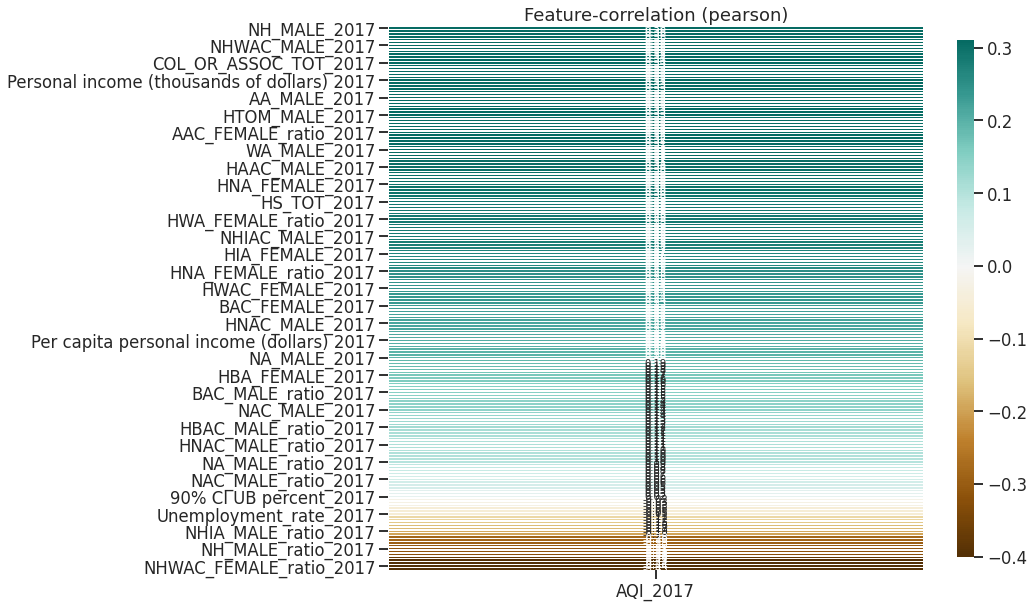

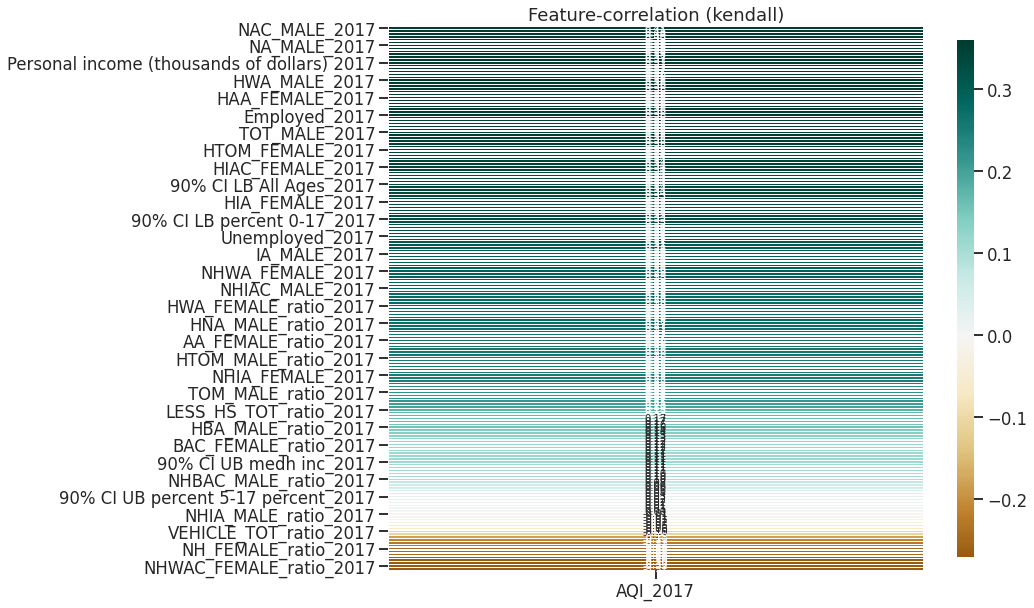

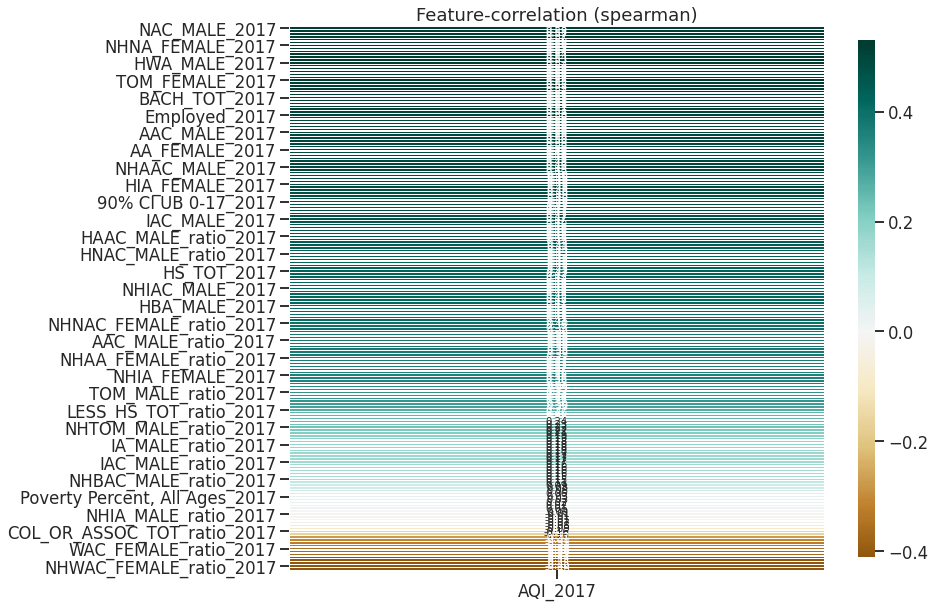

In [13]:
klib.corr_plot(df_2017, target='AQI_2017', method='pearson')
klib.corr_plot(df_2017, target='AQI_2017', method='kendall')
klib.corr_plot(df_2017, target='AQI_2017', method='spearman')

## Make one df of 2018
* Cleaning for datasets were done in Data_Wrangling4 and Data_Wrangling7 files
* So only transforming datasets into one will work

In [14]:
avg_co_2018 = avg_co_2017_2019.iloc[:, [0, 1, 2, 4]]

unemploy_col_2018 = list(unemploy_rate_2017_2019.columns[0:1]) + list(unemploy_rate_2017_2019.columns[7:11])
unemploy_rate_2018 = unemploy_rate_2017_2019.loc[:, unemploy_col_2018]

pov_col_2018 = list(pov_rate_2017_2019.columns[0:1]) + list(pov_rate_2017_2019.columns[24:45])
pov_rate_2018 = pov_rate_2017_2019.loc[:, pov_col_2018]

incomes_2018 = county_incomes_2017_2019.iloc[:, [0, 3, 6]]

educ_vehicle_2018_col = list(educ_vehicle_2017_2019.columns[0:1]) + list(educ_vehicle_2017_2019.columns[19:34])
educ_vehicle_2018 = educ_vehicle_2017_2019.loc[:, educ_vehicle_2018_col]

county_dem_ratio_2018_col = list(county_dem_ratio_2017_2019.columns[0:1]) + list(county_dem_ratio_2017_2019.columns[148:293])
county_dem_ratio_2018 = county_dem_ratio_2017_2019.loc[:, county_dem_ratio_2018_col]

In [15]:
avg_co_unemploy_2018 = pd.merge(avg_co_2018, unemploy_rate_2018, how='inner')
avg_co_unemploy_pov_2018 = pd.merge(avg_co_unemploy_2018, pov_rate_2018, how='inner')
avg_co_unemploy_pov_inc_2018 = pd.merge(avg_co_unemploy_pov_2018, incomes_2018, how='inner')
avg_co_unemploy_pov_inc_educ_veh_2018 = pd.merge(avg_co_unemploy_pov_inc_2018, educ_vehicle_2018, how='inner')
df_2018 = pd.merge(avg_co_unemploy_pov_inc_educ_veh_2018, county_dem_ratio_2018, how='inner')

df_2018

,GeoFIPS,State Name,County Name,AQI_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,"Poverty Estimate, All Ages_2018",90% CI LB All Ages_2018,...,HWAC_MALE_ratio_2018,HWAC_FEMALE_ratio_2018,HBAC_MALE_ratio_2018,HBAC_FEMALE_ratio_2018,HIAC_MALE_ratio_2018,HIAC_FEMALE_ratio_2018,HAAC_MALE_ratio_2018,HAAC_FEMALE_ratio_2018,HNAC_MALE_ratio_2018,HNAC_FEMALE_ratio_2018
0,1073,Alabama,Jefferson,4.434060,315793,304248,11545,3.7,103604.0,95029.0,...,1.881780,1.642027,0.173180,0.182885,0.057474,0.049588,0.018804,0.014255,0.016833,0.013497
1,4013,Arizona,Maricopa,6.272947,2217163,2127021,90142,4.1,535183.0,516969.0,...,14.450358,14.396433,0.537275,0.547746,0.760494,0.740368,0.267445,0.272011,0.076663,0.074596
2,4019,Arizona,Pima,3.667996,484209,463057,21152,4.4,164927.0,155454.0,...,16.838100,17.547952,0.535235,0.563019,1.233800,1.217399,0.298007,0.303795,0.067435,0.075442
3,5119,Arkansas,Pulaski,3.791781,188642,182165,6477,3.4,64312.0,58564.0,...,3.011599,2.606668,0.221985,0.206421,0.117882,0.111503,0.037253,0.037763,0.029343,0.023985
4,6001,California,Alameda,7.163689,842427,816611,25816,3.1,147394.0,137363.0,...,9.996604,9.762137,0.620967,0.653425,0.746660,0.724161,0.540271,0.556350,0.136493,0.145132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,53033,Washington,King,4.692641,1264754,1224648,40106,3.2,202628.0,191544.0,...,4.476962,4.137520,0.307580,0.308881,0.366233,0.340115,0.262839,0.262928,0.060493,0.063500
137,54039,West Virginia,Kanawha,3.167665,82348,78131,4217,5.1,30248.0,26699.0,...,0.506070,0.493875,0.043235,0.049886,0.026606,0.031040,0.009423,0.015520,0.005543,0.008869
138,55027,Wisconsin,Dodge,2.156164,47964,46703,1261,2.6,7283.0,5977.0,...,2.628852,2.048205,0.091082,0.070589,0.088805,0.069450,0.019355,0.023909,0.007970,0.013662
139,55079,Wisconsin,Milwaukee,4.252809,468452,451475,16977,3.6,177263.0,168055.0,...,7.050284,6.776885,0.644583,0.663274,0.316695,0.320602,0.073498,0.079728,0.020275,0.018797


* df_2018 contains data on NorthEastern counties of the US
* The columns of df_2018 go from average aqi, unemployment rate, poverty rate, education attainment ratio, total vehicle ratio, demographic ratios

<AxesSubplot:title={'center':'Feature-correlation (spearman)'}>

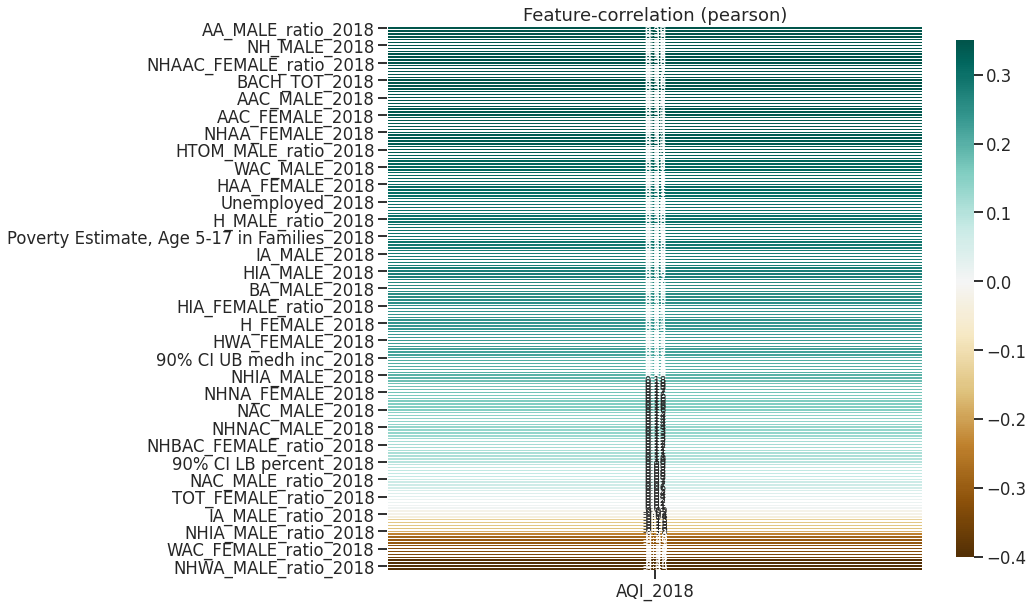

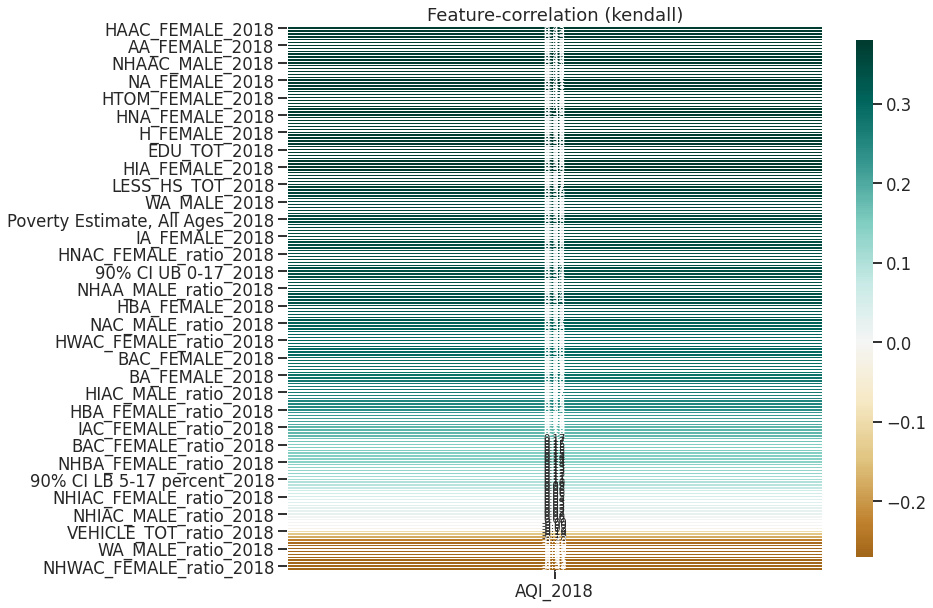

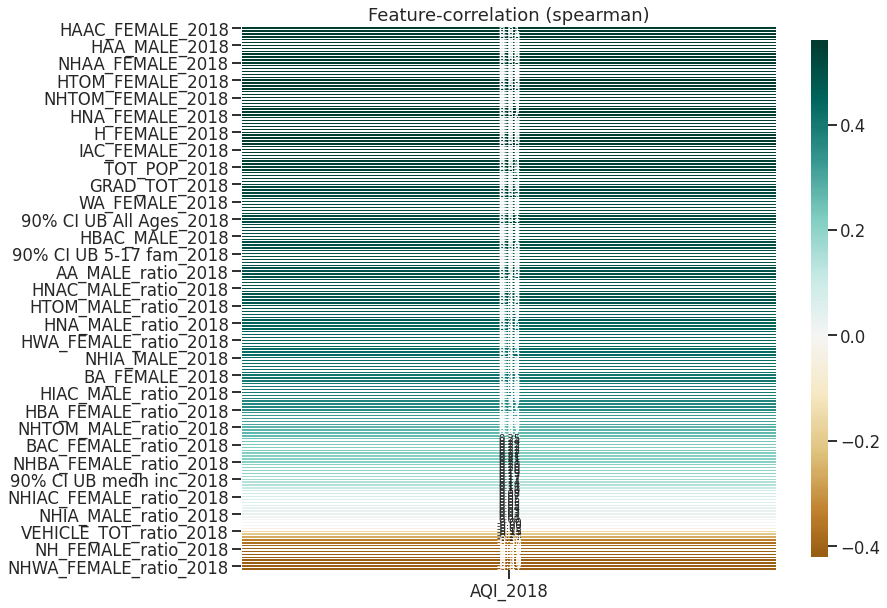

In [16]:
klib.corr_plot(df_2018, target='AQI_2018', method='pearson')
klib.corr_plot(df_2018, target='AQI_2018', method='kendall')
klib.corr_plot(df_2018, target='AQI_2018', method='spearman')

## Make one df of 2019
* Cleaning for datasets were done in Data_Wrangling4 and Data_Wrangling7 files
* So only transforming datasets into one will work

In [17]:
avg_co_2019 = avg_co_2017_2019.iloc[:,[0, 1, 2, 5]]

unemploy_col_2019 = list(unemploy_rate_2017_2019.columns[0:1]) + list(unemploy_rate_2017_2019.columns[11:])
unemploy_rate_2019 = unemploy_rate_2017_2019.loc[:, unemploy_col_2019]

pov_col_2019 = list(pov_rate_2017_2019.columns[0:1]) + list(pov_rate_2017_2019.columns[45:])
pov_rate_2019 = pov_rate_2017_2019.loc[:, pov_col_2019]

incomes_2019 = county_incomes_2017_2019.iloc[:, [0, 4, 7]]

educ_vehicle_2019_col = list(educ_vehicle_2017_2019.columns[0:1]) + list(educ_vehicle_2017_2019.columns[34:])
educ_vehicle_2019 = educ_vehicle_2017_2019.loc[:, educ_vehicle_2019_col]

county_dem_ratio_2019_col = list(county_dem_ratio_2017_2019.columns[0:1]) + list(county_dem_ratio_2017_2019.columns[293:])
county_dem_ratio_2019 = county_dem_ratio_2017_2019.loc[:, county_dem_ratio_2019_col]

In [18]:
avg_co_unemploy_2019 = pd.merge(avg_co_2019, unemploy_rate_2019, how='inner')
avg_co_unemploy_pov_2019 = pd.merge(avg_co_unemploy_2019, pov_rate_2019, how='inner')
avg_co_unemploy_pov_inc_2019 = pd.merge(avg_co_unemploy_pov_2019, incomes_2019, how='inner')
avg_co_unemploy_pov_inc_educ_veh_2019 = pd.merge(avg_co_unemploy_pov_inc_2019, educ_vehicle_2019, how='inner')
df_2019 = pd.merge(avg_co_unemploy_pov_inc_educ_veh_2019, county_dem_ratio_2019, how='inner')

df_2019

,GeoFIPS,State Name,County Name,AQI_2019,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,"Poverty Estimate, All Ages_2019",90% CI LB All Ages_2019,...,HWAC_MALE_ratio_2019,HWAC_FEMALE_ratio_2019,HBAC_MALE_ratio_2019,HBAC_FEMALE_ratio_2019,HIAC_MALE_ratio_2019,HIAC_FEMALE_ratio_2019,HAAC_MALE_ratio_2019,HAAC_FEMALE_ratio_2019,HNAC_MALE_ratio_2019,HNAC_FEMALE_ratio_2019
0,1073,Alabama,Jefferson,4.836009,318755,309664,9091,2.9,104288.0,95487.0,...,1.931601,1.694117,0.178872,0.190260,0.060586,0.053297,0.021106,0.013666,0.017766,0.013818
1,4013,Arizona,Maricopa,5.607080,2310503,2217656,92847,4.0,539670.0,518548.0,...,14.525995,14.484705,0.549158,0.555824,0.764946,0.747088,0.272394,0.278191,0.077228,0.075467
2,4019,Arizona,Pima,3.080000,498695,476620,22075,4.4,142859.0,130904.0,...,16.939230,17.625962,0.543886,0.567853,1.247041,1.226703,0.304503,0.311283,0.071423,0.079348
3,5119,Arkansas,Pulaski,5.186301,190248,183776,6472,3.4,56020.0,50104.0,...,3.039721,2.651622,0.216376,0.198770,0.115077,0.107933,0.035212,0.036998,0.028068,0.023475
4,6001,California,Alameda,6.389195,844346,819675,24671,2.9,146315.0,135008.0,...,9.990373,9.734588,0.623516,0.655825,0.742583,0.718470,0.544477,0.559196,0.137376,0.143120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,53033,Washington,King,4.572298,1290480,1254638,35842,2.8,171116.0,159252.0,...,4.529555,4.177368,0.312192,0.311792,0.365637,0.338426,0.268468,0.268601,0.059571,0.062856
137,54039,West Virginia,Kanawha,2.780822,82440,78647,3793,4.6,28499.0,24310.0,...,0.519301,0.531652,0.042105,0.047158,0.024702,0.024140,0.007298,0.011228,0.003930,0.007298
138,55027,Wisconsin,Dodge,1.531507,47544,46107,1437,3.0,6512.0,5410.0,...,2.651442,2.127756,0.095630,0.077414,0.091076,0.069445,0.026184,0.025046,0.009108,0.011384
139,55079,Wisconsin,Milwaukee,4.489011,466908,448251,18657,4.0,156647.0,147199.0,...,7.161165,6.882860,0.653572,0.676306,0.319120,0.322821,0.073383,0.080362,0.020619,0.018822


* df_2019 contains data on NorthEastern counties of the US
* The columns of df_2019 go from average aqi, unemployment rate, poverty rate, education attainment ratio, total vehicle ratio, demographic ratios

<AxesSubplot:title={'center':'Feature-correlation (spearman)'}>

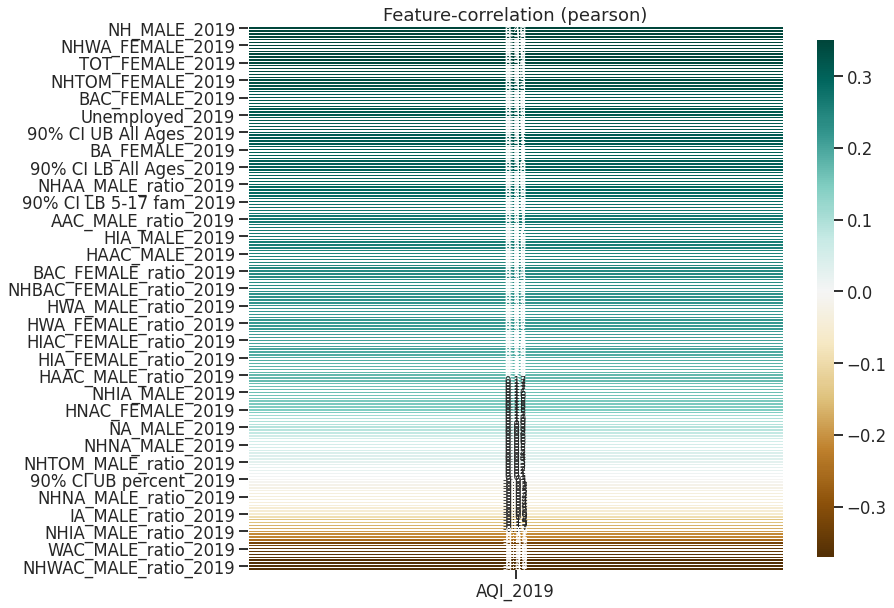

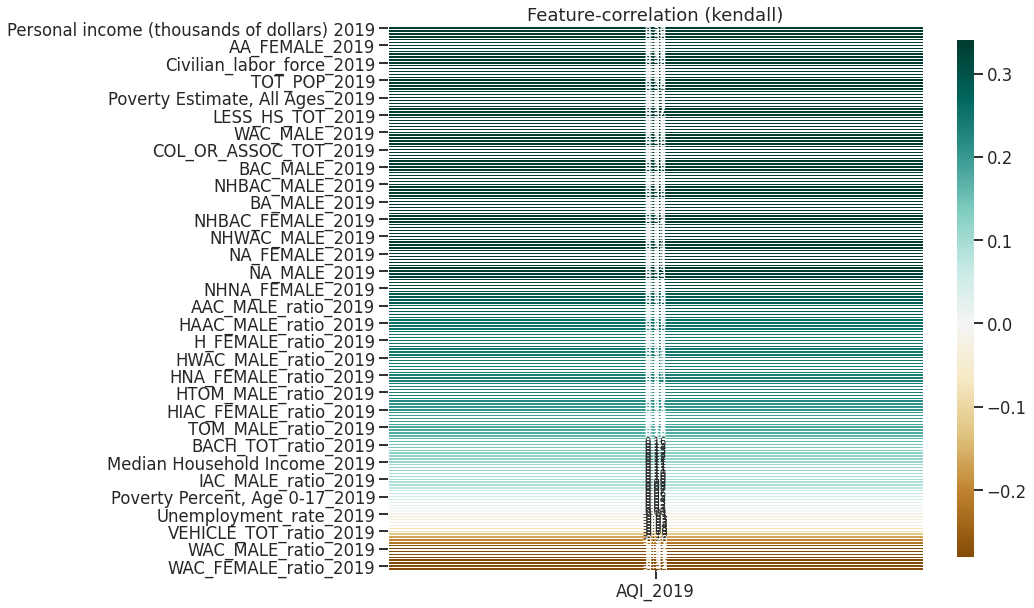

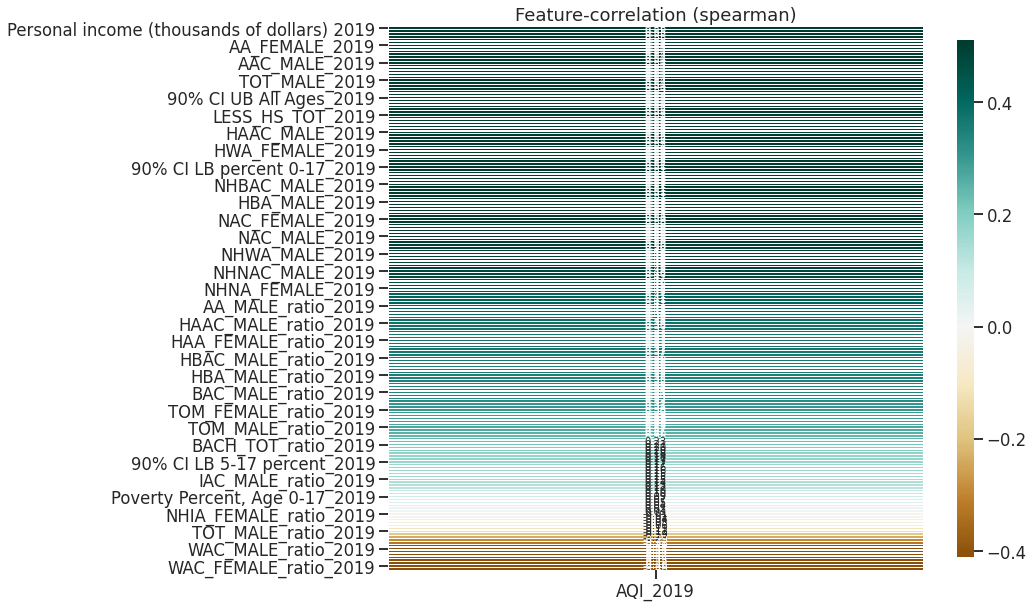

In [19]:
klib.corr_plot(df_2019, target='AQI_2019', method='pearson')
klib.corr_plot(df_2019, target='AQI_2019', method='kendall')
klib.corr_plot(df_2019, target='AQI_2019', method='spearman')

# Merge dataframe into df 2017-2019

In [20]:
pd.set_option('display.max_columns', 200)

df_2017_2018 = pd.merge(df_2017, df_2018, how='inner')
df_2017_2019 = pd.merge(df_2017_2018, df_2019, how='inner')

df_2017_2019

,GeoFIPS,State Name,County Name,AQI_2017,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,"Poverty Estimate, All Ages_2017",90% CI LB All Ages_2017,90% CI UB All Ages_2017,"Poverty Percent, All Ages_2017",90% CI LB percent_2017,90% CI UB percent_2017,"Poverty Estimate, Age 0-17_2017",90% CI LB percent 0-17_2017,90% CI UB 0-17_2017,"Poverty Percent, Age 0-17_2017",90% CI LB percent 0-17 percent_2017,90% CI UB 0-17 percent_2017,"Poverty Estimate, Age 5-17 in Families_2017",90% CI LB 5-17 fam_2017,90% CI UB 5-17 fam_2017,"Poverty Percent, Age 5-17 in Families_2017",90% CI LB 5-17 percent_2017,90% CI UB percent 5-17 percent_2017,Median Household Income_2017,90% CI Lower Bound LB medh inc_2017,90% CI UB medh inc_2017,Personal income (thousands of dollars) 2017,Per capita personal income (dollars) 2017,POP_2017,EDU_TOT_2017,LESS_HS_TOT_2017,HS_TOT_2017,COL_OR_ASSOC_TOT_2017,BACH_TOT_2017,GRAD_TOT_2017,VEHICLE_TOT_2017,EDU_TOT_ratio_2017,LESS_HS_TOT_ratio_2017,HS_TOT_ratio_2017,COL_OR_ASSOC_TOT_ratio_2017,BACH_TOT_ratio_2017,GRAD_TOT_ratio_2017,VEHICLE_TOT_ratio_2017,TOT_POP_2017,TOT_MALE_2017,TOT_FEMALE_2017,WA_MALE_2017,WA_FEMALE_2017,BA_MALE_2017,BA_FEMALE_2017,IA_MALE_2017,IA_FEMALE_2017,AA_MALE_2017,AA_FEMALE_2017,NA_MALE_2017,NA_FEMALE_2017,TOM_MALE_2017,TOM_FEMALE_2017,WAC_MALE_2017,WAC_FEMALE_2017,BAC_MALE_2017,BAC_FEMALE_2017,IAC_MALE_2017,IAC_FEMALE_2017,AAC_MALE_2017,AAC_FEMALE_2017,NAC_MALE_2017,NAC_FEMALE_2017,NH_MALE_2017,NH_FEMALE_2017,NHWA_MALE_2017,NHWA_FEMALE_2017,NHBA_MALE_2017,NHBA_FEMALE_2017,NHIA_MALE_2017,NHIA_FEMALE_2017,NHAA_MALE_2017,NHAA_FEMALE_2017,NHNA_MALE_2017,NHNA_FEMALE_2017,NHTOM_MALE_2017,NHTOM_FEMALE_2017,NHWAC_MALE_2017,NHWAC_FEMALE_2017,NHBAC_MALE_2017,NHBAC_FEMALE_2017,NHIAC_MALE_2017,NHIAC_FEMALE_2017,NHAAC_MALE_2017,NHAAC_FEMALE_2017,NHNAC_MALE_2017,NHNAC_FEMALE_2017,H_MALE_2017,H_FEMALE_2017,HWA_MALE_2017,HWA_FEMALE_2017,HBA_MALE_2017,...,NHAAC_MALE_2019,NHAAC_FEMALE_2019,NHNAC_MALE_2019,NHNAC_FEMALE_2019,H_MALE_2019,H_FEMALE_2019,HWA_MALE_2019,HWA_FEMALE_2019,HBA_MALE_2019,HBA_FEMALE_2019,HIA_MALE_2019,HIA_FEMALE_2019,HAA_MALE_2019,HAA_FEMALE_2019,HNA_MALE_2019,HNA_FEMALE_2019,HTOM_MALE_2019,HTOM_FEMALE_2019,HWAC_MALE_2019,HWAC_FEMALE_2019,HBAC_MALE_2019,HBAC_FEMALE_2019,HIAC_MALE_2019,HIAC_FEMALE_2019,HAAC_MALE_2019,HAAC_FEMALE_2019,HNAC_MALE_2019,HNAC_FEMALE_2019,TOT_MALE_ratio_2019,TOT_FEMALE_ratio_2019,WA_MALE_ratio_2019,WA_FEMALE_ratio_2019,BA_MALE_ratio_2019,BA_FEMALE_ratio_2019,IA_MALE_ratio_2019,IA_FEMALE_ratio_2019,AA_MALE_ratio_2019,AA_FEMALE_ratio_2019,NA_MALE_ratio_2019,NA_FEMALE_ratio_2019,TOM_MALE_ratio_2019,TOM_FEMALE_ratio_2019,WAC_MALE_ratio_2019,WAC_FEMALE_ratio_2019,BAC_MALE_ratio_2019,BAC_FEMALE_ratio_2019,IAC_MALE_ratio_2019,IAC_FEMALE_ratio_2019,AAC_MALE_ratio_2019,AAC_FEMALE_ratio_2019,NAC_MALE_ratio_2019,NAC_FEMALE_ratio_2019,NH_MALE_ratio_2019,NH_FEMALE_ratio_2019,NHWA_MALE_ratio_2019,NHWA_FEMALE_ratio_2019,NHBA_MALE_ratio_2019,NHBA_FEMALE_ratio_2019,NHIA_MALE_ratio_2019,NHIA_FEMALE_ratio_2019,NHAA_MALE_ratio_2019,NHAA_FEMALE_ratio_2019,NHNA_MALE_ratio_2019,NHNA_FEMALE_ratio_2019,NHTOM_MALE_ratio_2019,NHTOM_FEMALE_ratio_2019,NHWAC_MALE_ratio_2019,NHWAC_FEMALE_ratio_2019,NHBAC_MALE_ratio_2019,NHBAC_FEMALE_ratio_2019,NHIAC_MALE_ratio_2019,NHIAC_FEMALE_ratio_2019,NHAAC_MALE_ratio_2019,NHAAC_FEMALE_ratio_2019,NHNAC_MALE_ratio_2019,NHNAC_FEMALE_ratio_2019,H_MALE_ratio_2019,H_FEMALE_ratio_2019,HWA_MALE_ratio_2019,HWA_FEMALE_ratio_2019,HBA_MALE_ratio_2019,HBA_FEMALE_ratio_2019,HIA_MALE_ratio_2019,HIA_FEMALE_ratio_2019,HAA_MALE_ratio_2019,HAA_FEMALE_ratio_2019,HNA_MALE_ratio_2019,HNA_FEMALE_ratio_2019,HTOM_MALE_ratio_2019,HTOM_FEMALE_ratio_2019,HWAC_MALE_ratio_2019,HWAC_FEMALE_ratio_2019,HBAC_MALE_ratio_2019,HBAC_FEMALE_ratio_2019,HIAC_MALE_ratio_2019,HIAC_FEMALE_ratio_2019,HAAC_MALE_ratio_2019,HAAC_FEMALE_ratio_2019,HNAC_MALE_ratio_2019,HNAC_FEMALE_ratio_2019
0,1073,Alabama,Jefferson,5.154717,311481,298227,13254,4.3,107752.0,99555.0,115949.0,16

# save data


In [21]:
# save 2017-2019 dataset
# data_path = r'../../data/processed/all_co_df_2017_2019'
# df_2017_2019.to_csv(data_path, index=False)
#
# save datasets for individual years
data_path = r'../../data/processed/all_co_df_2017'
df_2017.to_csv(data_path, index=False)
data_path = r'../../data/processed/all_co_df_2018'
df_2018.to_csv(data_path, index=False)
data_path = r'../../data/processed/all_co_df_2019'
df_2019.to_csv(data_path, index=False)

In [22]:
display(df_2017.corr()['AQI_2017'].sort_values().tail(15))
display(df_2018.corr()['AQI_2018'].sort_values().tail(15))
display(df_2019.corr()['AQI_2019'].sort_values().tail(15))

VEHICLE_TOT_2017         0.333203
COL_OR_ASSOC_TOT_2017    0.335617
NHWA_FEMALE_2017         0.336876
NHWAC_FEMALE_2017        0.342664
GRAD_TOT_2017            0.346949
NHWA_MALE_2017           0.347774
BACH_TOT_2017            0.350767
NHWAC_MALE_2017          0.352818
NHTOM_MALE_2017          0.354049
NH_FEMALE_2017           0.354382
TOM_MALE_2017            0.355408
TOM_FEMALE_2017          0.358646
NHTOM_FEMALE_2017        0.359058
NH_MALE_2017             0.364061
AQI_2017                 1.000000
Name: AQI_2017, dtype: float64

HAA_FEMALE_ratio_2018      0.375899
NHAAC_FEMALE_ratio_2018    0.376347
NHTOM_MALE_2018            0.377453
NHAAC_MALE_ratio_2018      0.377484
TOM_MALE_2018              0.377982
AAC_FEMALE_ratio_2018      0.378883
AAC_MALE_ratio_2018        0.380111
NH_MALE_2018               0.381136
TOM_FEMALE_2018            0.382606
NHTOM_FEMALE_2018          0.383754
NHAA_FEMALE_ratio_2018     0.390242
NHAA_MALE_ratio_2018       0.393390
AA_FEMALE_ratio_2018       0.394668
AA_MALE_ratio_2018         0.398134
AQI_2018                   1.000000
Name: AQI_2018, dtype: float64

POP_2019                                       0.343159
TOT_FEMALE_2019                                0.343402
EDU_TOT_2019                                   0.345006
Civilian_labor_force_2019                      0.346009
Employed_2019                                  0.346890
Personal income (thousands of dollars) 2019    0.362523
BACH_TOT_2019                                  0.374409
NHWA_FEMALE_2019                               0.383362
NHWAC_FEMALE_2019                              0.385280
NHWA_MALE_2019                                 0.385694
NHWAC_MALE_2019                                0.386944
GRAD_TOT_2019                                  0.394305
NH_FEMALE_2019                                 0.401112
NH_MALE_2019                                   0.403447
AQI_2019                                       1.000000
Name: AQI_2019, dtype: float64

In [23]:
display(df_2017.corr()['AQI_2017'].sort_values().head(15))
display(df_2018.corr()['AQI_2018'].sort_values().head(15))
display(df_2019.corr()['AQI_2019'].sort_values().head(15))

NHWA_FEMALE_ratio_2017        -0.449012
NHWAC_FEMALE_ratio_2017       -0.443305
NHWA_MALE_ratio_2017          -0.439776
NHWAC_MALE_ratio_2017         -0.433305
HS_TOT_ratio_2017             -0.377014
WA_FEMALE_ratio_2017          -0.320339
WAC_FEMALE_ratio_2017         -0.312631
NH_MALE_ratio_2017            -0.310288
GeoFIPS                       -0.304757
WA_MALE_ratio_2017            -0.292861
NH_FEMALE_ratio_2017          -0.285729
WAC_MALE_ratio_2017           -0.282624
COL_OR_ASSOC_TOT_ratio_2017   -0.192158
NHIA_MALE_ratio_2017          -0.188117
NHIA_FEMALE_ratio_2017        -0.171811
Name: AQI_2017, dtype: float64

NHWA_FEMALE_ratio_2018        -0.451267
NHWA_MALE_ratio_2018          -0.449041
NHWAC_FEMALE_ratio_2018       -0.442798
NHWAC_MALE_ratio_2018         -0.439968
GeoFIPS                       -0.356460
WA_FEMALE_ratio_2018          -0.339070
HS_TOT_ratio_2018             -0.327045
WAC_FEMALE_ratio_2018         -0.325671
WA_MALE_ratio_2018            -0.319106
NH_MALE_ratio_2018            -0.307714
WAC_MALE_ratio_2018           -0.303809
NH_FEMALE_ratio_2018          -0.280571
COL_OR_ASSOC_TOT_ratio_2018   -0.237469
NHIA_MALE_ratio_2018          -0.180107
NHIA_FEMALE_ratio_2018        -0.162079
Name: AQI_2018, dtype: float64

NHWA_MALE_ratio_2019          -0.424638
NHWAC_MALE_ratio_2019         -0.422365
NHWA_FEMALE_ratio_2019        -0.420789
NHWAC_FEMALE_ratio_2019       -0.418290
WA_FEMALE_ratio_2019          -0.356751
WAC_FEMALE_ratio_2019         -0.356231
WA_MALE_ratio_2019            -0.347432
WAC_MALE_ratio_2019           -0.346246
GeoFIPS                       -0.323973
HS_TOT_ratio_2019             -0.323230
NH_MALE_ratio_2019            -0.256045
COL_OR_ASSOC_TOT_ratio_2019   -0.212850
NH_FEMALE_ratio_2019          -0.209807
NHIA_MALE_ratio_2019          -0.190608
NHIA_FEMALE_ratio_2019        -0.172111
Name: AQI_2019, dtype: float64

In [24]:
display(df_2017.shape)
display(df_2018.shape)
display(df_2019.shape)

(141, 191)

(141, 191)

(141, 191)

# Result
 Least recorded pollutants, co, We have less observations for this measure.
We drop from 1000 counties to 141 counties.

## postive covariance
Correlation is consistent we get r values around .39
* moderate r for non hispanic demographic
* 2018 shows shows moderate r for african american populations
* more jumbled features some education total, labor force, and vehicle totals are weak_moderate relationship

## negative covariance
Consistent negative covariances and r values around -45
* larger negative covariances
* all point to non hispanic and white ratios in counties
* also moderate r for white ethnicities and
* also moderate weak for high school attainment ratio
